<a href="https://colab.research.google.com/github/Tema13379/2intensiv2/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install pandas scikit-learn lightgbm xgboost catboost matplotlib seaborn optuna --quiet

# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Загружаем данные из pandas
train = pd.read_csv('train.csv')
train.head()


<ipython-input-114-7748567f3f87>:24: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,165

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [115]:
valid = pd.read_csv('valid.csv')
valid.head()

<ipython-input-115-4dca6dd4317a>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  valid = pd.read_csv('valid.csv')


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


In [116]:
# Вычислить общее количество строк
total_rows = train.shape[0]

# Вычислить процент пропущенных значений для каждого столбца
missing_values = (train.isnull().sum() / total_rows) * 100

# Вывести столбцы с пропущенными значениями и их проценты
print(missing_values[missing_values > 0])

# Альтернативно, пройтись по каждому столбцу и вывести процент пропущенных значений
for column in train.columns:
    missing_count =train[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

col1       99.979247
col2       99.958495
col3       99.916989
col4       99.868567
col5       99.993082
             ...    
col2658    96.499723
col2659    96.499723
col2660    44.410625
col2661    44.410625
col2662    44.410625
Length: 2661, dtype: float64
col1: 99.98%
col2: 99.96%
col3: 99.92%
col4: 99.87%
col5: 99.99%
col6: 99.99%
col7: 99.98%
col8: 99.94%
col9: 99.99%
col10: 99.99%
col11: 99.98%
col12: 99.94%
col13: 99.99%
col14: 99.99%
col15: 99.98%
col16: 99.94%
col17: 99.99%
col18: 99.99%
col19: 99.98%
col20: 99.94%
col21: 99.99%
col22: 99.99%
col23: 99.98%
col24: 99.94%
col25: 99.99%
col26: 99.99%
col27: 99.98%
col28: 99.94%
col29: 99.99%
col30: 99.99%
col31: 99.98%
col32: 99.94%
col33: 99.99%
col34: 99.99%
col35: 99.98%
col36: 99.94%
col37: 99.99%
col38: 99.99%
col39: 99.98%
col40: 99.94%
col41: 99.99%
col42: 99.99%
col43: 99.98%
col44: 99.94%
col45: 99.97%
col46: 99.88%
col47: 99.69%
col48: 99.17%
col49: 99.97%
col50: 99.89%
col51: 99.73%
col52: 99.26%
col53: 99.97%
col54: 

In [117]:
train.describe(include=['object'])

,report_date,col49,col50,col51,col52,col53,col54,col55,col56,col57,...,col1653,col1654,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198
count,14456,5,16,39,107,5,18,45,120,5,...,2,18,19,66,106,156,273,353,36,369
unique,25,5,8,9,18,5,9,10,20,3,...,2,11,7,21,33,38,45,50,17,50
top,2023-01-01,https://samolet.ru/commercial/,https://samolet.ru/,https://samolet.ru/,https://samolet.ru/project/,https://samolet.ru/commercial/,https://samolet.ru/,https://samolet.ru/,https://samolet.ru/project/,main,...,Тестовая бронь,Дубль заявки,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры
freq,1159,1,6,17,40,1,6,19,45,3,...,1,3,13,42,59,82,146,189,20,191


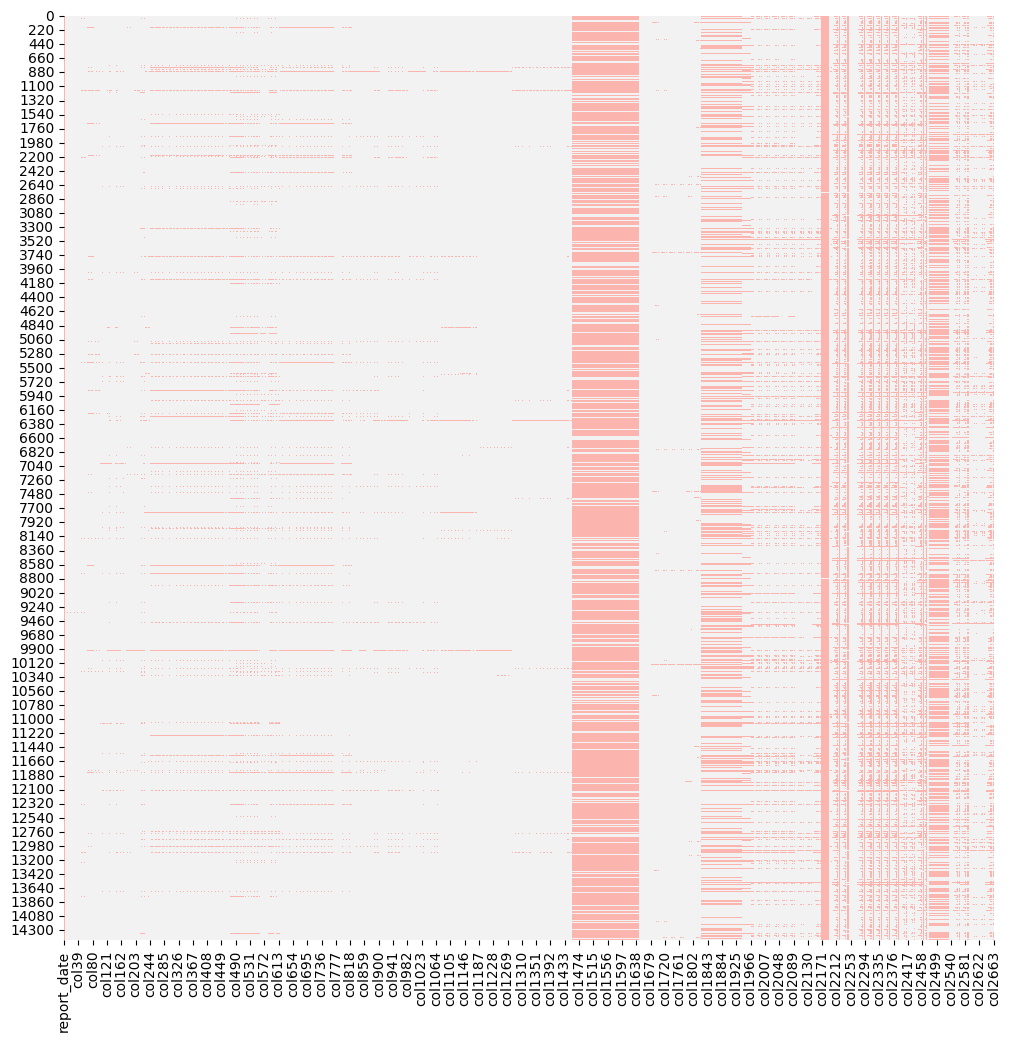

In [118]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.isnull(), cbar = False, cmap = 'Pastel1')
plt.show()

In [119]:
# Устанавливаем порог заполненности
threshold = 0.2

# Рассчитываем порог количества ненулевых значений
min_non_null_count = int(threshold * len(train))

# Удаляем столбцы, где количество ненулевых значений меньше порога
filtered_train = train.dropna(axis=1, thresh=min_non_null_count)

# Сохраняем результат (опционально)
filtered_train.to_csv("filtered_train.csv", index=False)


Удалены столбцы с менее чем 20% заполненности данных.


In [120]:
filtered_train = filtered_train.copy()

# Добавляем столбец с количеством ненулевых значений
filtered_train['non_null_count'] = filtered_train.notnull().sum(axis=1)

# Сортируем строки по количеству ненулевых значений
train_sorted = filtered_train.sort_values(by='non_null_count', ascending=False)

# Сохраняем только первые 3000 строк
filtered_train = train_sorted.head(3000)

# Удаляем вспомогательный столбец
filtered_train = filtered_train.drop(columns=['non_null_count'])

# Сохраняем результат (опционально)
filtered_train.to_csv("filtered_train.csv", index=False)

print("Фильтрация завершена. Сохранено 3000 строк с наибольшим количеством данных.")

Фильтрация завершена. Сохранено 3000 строк с наибольшим количеством данных.


In [121]:
for column in filtered_train.columns:
    print(f"Столбец: {column}")
    print(train[column].unique())
    print("-" * 50)

Выходные данные были обрезаны до нескольких последних строк (5000).
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1522
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1523
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1524
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1525
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1526
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1527
[ 0. nan]
--------------------------------------------------
Столбец: col1528
[ 0. nan]
--------------------------------------------------
Столбец: col1529
[ 0. nan]
--------------------------------------------------
Столбец: col1530
[ 0. nan]
--------------------------------------------------
Столбец: col1531
[ 0. nan]
--------------------------------------------------
Столбец: col1532
[ 0. nan]
----------------------------------------

In [76]:
# Количество пропусков в каждом столбце
missing_count = data.isna().sum()

# Процент пропусков
missing_percentage = (data.isna().mean() * 100).round(2)

# Таблица с результатами
missing_summary = pd.DataFrame({
    'Количество пропусков': missing_count,
    'Процент пропусков': missing_percentage
}).sort_values(by='Процент пропусков', ascending=False)

print(missing_summary)

             Количество пропусков  Процент пропусков
col2261                     14456              100.0
col1800                     14456              100.0
col781                      14456              100.0
col782                      14456              100.0
col1799                     14456              100.0
...                           ...                ...
report_date                     0                0.0
col1453                         0                0.0
client_id                       0                0.0
target                          0                0.0
col2663                         0                0.0

[2666 rows x 2 columns]


In [77]:
threshold = 0.9
missing_percentage = data.isnull().mean()

# Удаляем колонки, где процент пропусков больше 90%
data = data.loc[:, missing_percentage <= threshold]


print(data)



      report_date  client_id  target   col476   col480     col484   col488  \
0      2022-11-01          1       0      NaN      NaN        NaN      NaN   
1      2022-11-01          5       0  55.7483  55.7483  55.748299  55.7483   
2      2022-05-01          6       0      NaN      NaN        NaN      NaN   
3      2022-09-01          7       0      NaN      NaN        NaN      NaN   
4      2022-08-01          8       0      NaN      NaN        NaN      NaN   
...           ...        ...     ...      ...      ...        ...      ...   
14451  2022-07-01       1241       0      NaN      NaN        NaN      NaN   
14452  2022-09-01       1969       1      NaN      NaN        NaN      NaN   
14453  2022-02-01       7116       1      NaN      NaN        NaN      NaN   
14454  2021-08-01       7117       0      NaN      NaN        NaN      NaN   
14455  2022-03-01        849       0      NaN      NaN        NaN      NaN   

          col492   col496   col500  ...  col2651  col2652  col2

In [78]:
threshold = 0.7
data = data[data.isnull().mean(axis=1) < threshold]

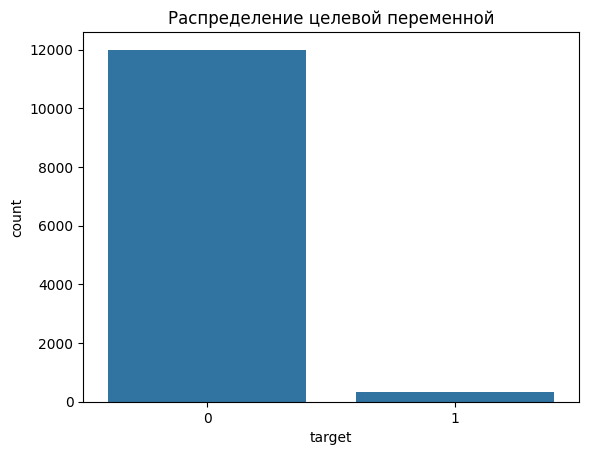

In [79]:
sns.countplot(x='target', data=data)
plt.title('Распределение целевой переменной')
plt.show()

In [81]:
target_counts = data['target'].value_counts()
print(target_counts)

target
0    11995
1      341
Name: count, dtype: int64


In [82]:
data = data.loc[:, ~data.T.duplicated()]

In [83]:
data


,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450,2022-08-01,1240,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:
data = data.rename(columns={'col2663': 'probability_of_purchase'})

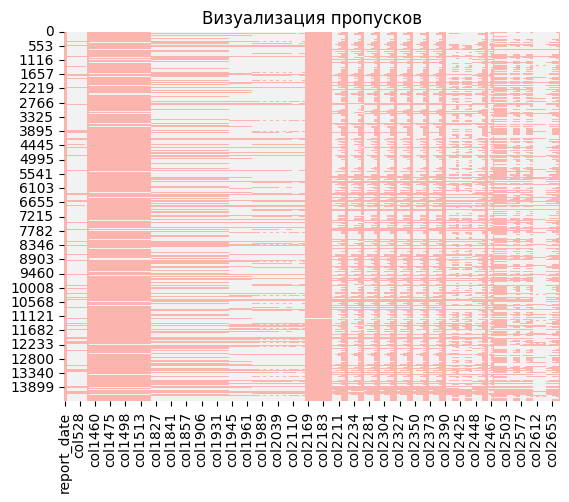

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isna(), cmap="Pastel1", cbar=False)
plt.title("Визуализация пропусков")
plt.show()

In [92]:
# Вычислить общее количество строк
total_rows = data.shape[0]

# Вычислить процент пропущенных значений для каждого столбца
missing_values = (data.isnull().sum() / total_rows) * 100

# Вывести столбцы с пропущенными значениями и их проценты
print(missing_values[missing_values > 0])

# Альтернативно, пройтись по каждому столбцу и вывести процент пропущенных значений
for column in data.columns:
    missing_count =data[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

col476     87.289235
col480     87.289235
col484     87.289235
col488     87.289235
col492     87.289235
             ...    
col2655    52.812905
col2656    52.812905
col2660    37.986381
col2661    37.986381
col2662    37.986381
Length: 449, dtype: float64
col476: 87.29%
col480: 87.29%
col484: 87.29%
col488: 87.29%
col492: 87.29%
col496: 87.29%
col500: 87.29%
col504: 87.29%
col508: 87.29%
col512: 87.29%
col528: 87.29%
col536: 87.29%
col544: 87.29%
col552: 87.29%
col592: 87.29%
col600: 87.68%
col608: 87.72%
col1455: 9.95%
col1456: 9.95%
col1457: 9.95%
col1458: 9.95%
col1459: 9.95%
col1460: 9.95%
col1461: 9.95%
col1462: 9.95%
col1463: 9.95%
col1464: 9.95%
col1465: 9.95%
col1466: 9.95%
col1467: 9.95%
col1468: 9.95%
col1469: 9.95%
col1470: 9.95%
col1471: 9.95%
col1472: 9.95%
col1474: 9.95%
col1475: 9.95%
col1476: 9.95%
col1479: 9.95%
col1487: 9.95%
col1488: 9.95%
col1489: 9.95%
col1490: 9.95%
col1491: 9.95%
col1492: 9.95%
col1493: 9.95%
col1494: 9.95%
col1495: 9.95%
col1496: 9.95%
col149

In [93]:
data.describe(include=['object'])

,report_date,col528,col536,col544,col552,col592,col600,col608,col1454
count,12336,1568,1568,1568,1568,1568,1520,1515,12336
unique,25,7,4,5,188,24,95,152,4746
top,2023-01-01,Chrome,Android,Android,/,Russia,St.-Petersburg,St Petersburg,205d707a-4f9e-42b8-9e62-104f56c7d392
freq,1156,981,624,625,248,1507,739,727,12


In [109]:
# Устанавливаем порог заполненности
threshold = 0.2

# Рассчитываем порог количества ненулевых значений
min_non_null_count = int(threshold * len(data))

# Удаляем столбцы, где количество ненулевых значений меньше порога
filtered_train = data.dropna(axis=1, thresh=min_non_null_count)

# Сохраняем результат (опционально)
filtered_train.to_csv("sort_data.csv", index=False)


In [111]:
sort_data.info()

NameError: name 'sort_data' is not defined

In [100]:
filtered_data = filtered_data.copy()

# Добавляем столбец с количеством ненулевых значений
filtered_data['non_null_count'] = filtered_data.notnull().sum(axis=1)

# Сортируем строки по количеству ненулевых значений
data_sorted = filtered_data.sort_values(by='non_null_count', ascending=False)

# Сохраняем только первые 3000 строк
filtered_data = data_sorted.head(3000)

# Удаляем вспомогательный столбец
filtered_data = filtered_data.drop(columns=['non_null_count'])

# Сохраняем результат (опционально)
filtered_data.to_csv("filtered_data.csv", index=False)



NameError: name 'filtered_data' is not defined

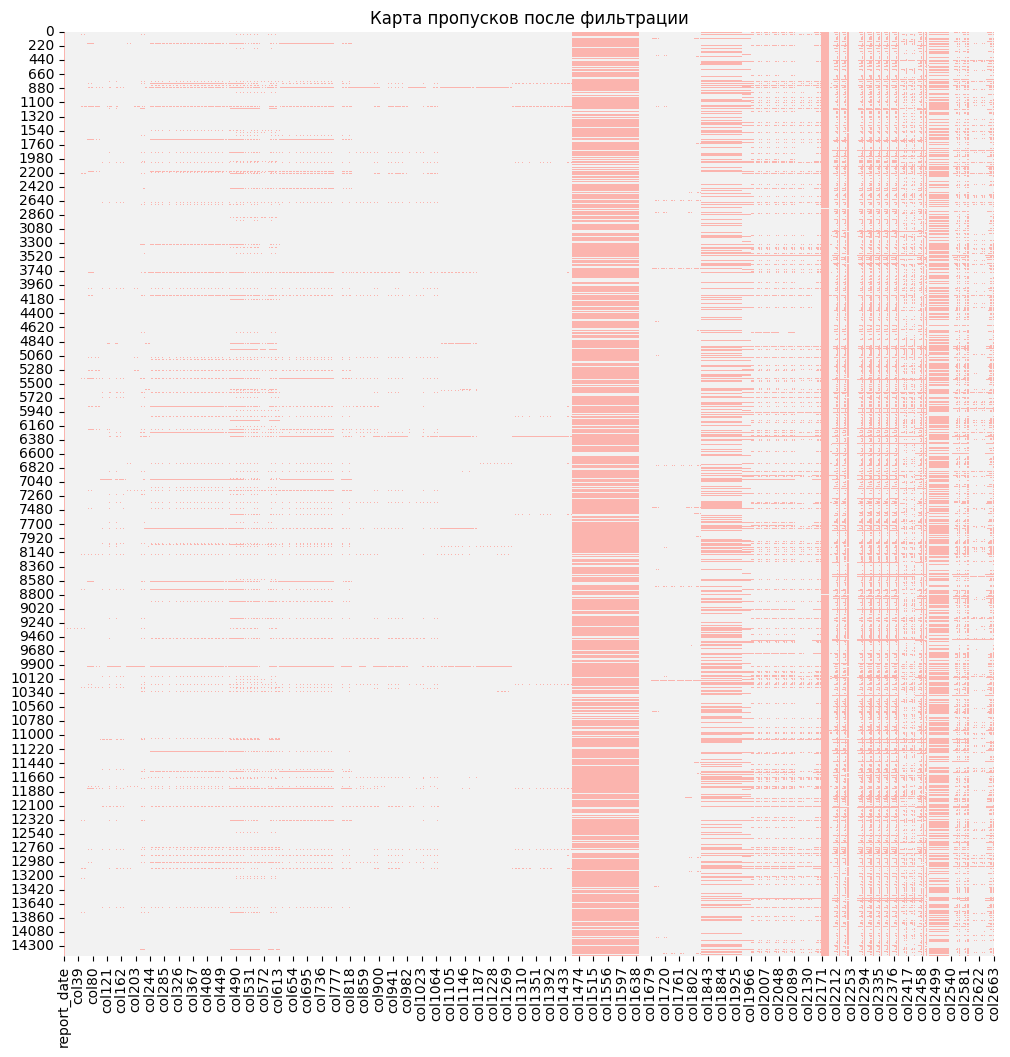

In [113]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.isnull(), cbar=False, cmap='Pastel1')
plt.title("Карта пропусков после фильтрации")
plt.show()